In [168]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
iris = load_iris()

X = iris.data
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


In [170]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [171]:
input_size = 4
hidden_size = [3]
output_size = 3

In [172]:
np.random.seed(42)
hidden_layers = len(hidden_size)
Ws = []
bs = []

# W1 = np.random.randn(input_size, hidden_size)
# b1 = np.random.randn(1, hidden_size)
# W2 = np.random.randn(hidden_size, output_size)
# b2 = np.random.randn(1, output_size)

for i in range(hidden_layers + 1):
    if i == 0:
        W = np.random.randn(input_size, hidden_size[i])
        b = np.random.randn(1, hidden_size[i])
    elif i == hidden_layers:
        W = np.random.randn(hidden_size[i - 1], output_size)
        b = np.random.randn(1, output_size)
    else:
        W = np.random.randn(hidden_size[i - 1], hidden_size[i])
        b = np.random.randn(1, hidden_size[i])
    Ws.append(W)
    bs.append(b)
print(hidden_layers)  

1


In [173]:
print(Ws)

[array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]]), array([[-0.56228753, -1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ,  1.46564877],
       [-0.2257763 ,  0.0675282 , -1.42474819]])]


In [174]:
learning_rate = 0.01
num_epochs = 1000

In [175]:
print(X_train)
print(Y_train)

[[6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.

In [191]:
lossarray=[]
epoc=[]
weight_matrix=[]
final_output=[]
for epoch in range(num_epochs):
    z = []
    a = [X_train]
    new_Ws = np.concatenate(Ws, axis=0)
    new_Ws = np.concatenate(new_Ws, axis=0)
#     print(new_Ws)
    weight_matrix.append(new_Ws)
    for i in range(hidden_layers + 1):
        ztemp = np.dot(a[i], Ws[i]) + bs[i]
        z.append(ztemp)
        if i == hidden_layers:
            atemp = np.exp(ztemp) / np.sum(np.exp(ztemp), axis=1, keepdims=True)
        else:
            atemp = sigmoid(ztemp)
        a.append(atemp)
    loss = -np.sum(np.log(a[-1][np.arange(len(Y_train)), Y_train])) / len(Y_train)
#     if epoch==10:
#         print(a[-1])
    max_indices = np.argmax(a[-1], axis=1)
    final_output.append(max_indices)
#     z1 = np.dot(X_train, W1)+b1
#     a1 = sigmoid(z1)
#     z2 = np.dot(a1, W2) + b2
#     a2 = np.exp(z2) / np.sum(np.exp(z2), axis=1, keepdims=True)
#     loss = -np.sum(np.log(a2[np.arange(len(Y_train)), Y_train])) / len(Y_train)



#     Back
    dL_da = [a[-1]]
    dL_da[-1][np.arange(len(Y_train)), Y_train] -= 1
    dL_da[-1] /= len(Y_train)
    dL_dz = [dL_da[-1]]
    for i in range(hidden_layers, -1, -1):
        if i == hidden_layers:
            dL_dW = np.dot(a[i].T, dL_dz[-1])
        else:
            dL_dW = np.dot(a[i].T, dL_dz[-1])
        dL_db = np.sum(dL_dz[-1], axis=0, keepdims=True)
        dL_da_i = np.dot(dL_dz[-1], Ws[i].T)
        dL_dz_i = dL_da_i * sigmoid_derivative(a[i])
        dL_dz.append(dL_dz_i)
        dL_da.append(dL_da_i)
        Ws[i] -= learning_rate * dL_dW
        bs[i] -= learning_rate * dL_db
        
#     dL_da2 = a2
#     dL_da2[np.arange(len(Y_train)), Y_train] -= 1
#     dL_da2 /= len(Y_train)
#     dL_dz2 = dL_da2
#     dL_dW2 = np.dot(a1.T, dL_dz2)
#     dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
#     dL_da1 = np.dot(dL_dz2, W2.T)
#     dL_dz1 = dL_da1 * sigmoid_derivative(a1)
#     dL_dW1 = np.dot(X_train.T, dL_dz1)
#     dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
#     W2 -= learning_rate * dL_dW2
#     b2 -= learning_rate * dL_db2
#     W1 -= learning_rate * dL_dW1
#     b1 -= learning_rate * dL_db1
    print(f"Epoch {epoch}, Loss: {loss}")
    epoc.append(epoch)
    lossarray.append(loss)
new_Ws = np.concatenate(Ws, axis=0)
new_Ws = np.concatenate(new_Ws, axis=0)
#     print(new_Ws)
weight_matrix.append(new_Ws)

Epoch 0, Loss: 148.32484548398043
Epoch 1, Loss: 148.3248079365021
Epoch 2, Loss: 148.32477056631222
Epoch 3, Loss: 148.32473337239634
Epoch 4, Loss: 148.32469635374667
Epoch 5, Loss: 148.32465950936177
Epoch 6, Loss: 148.3246228382466
Epoch 7, Loss: 148.3245863394124
Epoch 8, Loss: 148.32455001187685
Epoch 9, Loss: 148.32451385466376
Epoch 10, Loss: 148.32447786680322
Epoch 11, Loss: 148.32444204733144
Epoch 12, Loss: 148.3244063952908
Epoch 13, Loss: 148.32437090972977
Epoch 14, Loss: 148.32433558970277
Epoch 15, Loss: 148.32430043427036
Epoch 16, Loss: 148.32426544249893
Epoch 17, Loss: 148.32423061346083
Epoch 18, Loss: 148.3241959462344
Epoch 19, Loss: 148.32416143990355
Epoch 20, Loss: 148.3241270935582
Epoch 21, Loss: 148.32409290629403
Epoch 22, Loss: 148.32405887721225
Epoch 23, Loss: 148.32402500541997
Epoch 24, Loss: 148.32399129002977
Epoch 25, Loss: 148.32395773015986
Epoch 26, Loss: 148.32392432493413
Epoch 27, Loss: 148.3238910734818
Epoch 28, Loss: 148.32385797493768
Ep

Epoch 239, Loss: 148.31927717912055
Epoch 240, Loss: 148.31926332788555
Epoch 241, Loss: 148.31924952670255
Epoch 242, Loss: 148.31923577532982
Epoch 243, Loss: 148.31922207352696
Epoch 244, Loss: 148.319208421055
Epoch 245, Loss: 148.31919481767625
Epoch 246, Loss: 148.31918126315438
Epoch 247, Loss: 148.3191677572543
Epoch 248, Loss: 148.3191542997424
Epoch 249, Loss: 148.31914089038622
Epoch 250, Loss: 148.31912752895468
Epoch 251, Loss: 148.31911421521795
Epoch 252, Loss: 148.3191009489475
Epoch 253, Loss: 148.31908772991613
Epoch 254, Loss: 148.31907455789786
Epoch 255, Loss: 148.31906143266798
Epoch 256, Loss: 148.31904835400294
Epoch 257, Loss: 148.31903532168062
Epoch 258, Loss: 148.31902233548004
Epoch 259, Loss: 148.31900939518138
Epoch 260, Loss: 148.31899650056613
Epoch 261, Loss: 148.31898365141708
Epoch 262, Loss: 148.318970847518
Epoch 263, Loss: 148.31895808865406
Epoch 264, Loss: 148.31894537461153
Epoch 265, Loss: 148.3189327051779
Epoch 266, Loss: 148.3189200801418
E

Epoch 503, Loss: 148.3168272734552
Epoch 504, Loss: 148.31682114170835
Epoch 505, Loss: 148.3168150259275
Epoch 506, Loss: 148.31680892605198
Epoch 507, Loss: 148.31680284202122
Epoch 508, Loss: 148.31679677377522
Epoch 509, Loss: 148.3167907212541
Epoch 510, Loss: 148.3167846843983
Epoch 511, Loss: 148.31677866314854
Epoch 512, Loss: 148.3167726574458
Epoch 513, Loss: 148.31676666723146
Epoch 514, Loss: 148.31676069244705
Epoch 515, Loss: 148.31675473303437
Epoch 516, Loss: 148.31674878893563
Epoch 517, Loss: 148.31674286009317
Epoch 518, Loss: 148.3167369464497
Epoch 519, Loss: 148.3167310479482
Epoch 520, Loss: 148.31672516453185
Epoch 521, Loss: 148.31671929614419
Epoch 522, Loss: 148.3167134427289
Epoch 523, Loss: 148.31670760423012
Epoch 524, Loss: 148.31670178059207
Epoch 525, Loss: 148.31669597175934
Epoch 526, Loss: 148.31669017767675
Epoch 527, Loss: 148.31668439828942
Epoch 528, Loss: 148.3166786335426
Epoch 529, Loss: 148.31667288338198
Epoch 530, Loss: 148.31666714775335
E

Epoch 739, Loss: 148.31572074557062
Epoch 740, Loss: 148.315717171778
Epoch 741, Loss: 148.31571360516728
Epoch 742, Loss: 148.31571004571714
Epoch 743, Loss: 148.3157064934062
Epoch 744, Loss: 148.3157029482132
Epoch 745, Loss: 148.31569941011693
Epoch 746, Loss: 148.31569587909638
Epoch 747, Loss: 148.31569235513052
Epoch 748, Loss: 148.3156888381983
Epoch 749, Loss: 148.31568532827905
Epoch 750, Loss: 148.31568182535193
Epoch 751, Loss: 148.3156783293963
Epoch 752, Loss: 148.3156748403915
Epoch 753, Loss: 148.31567135831705
Epoch 754, Loss: 148.31566788315254
Epoch 755, Loss: 148.3156644148776
Epoch 756, Loss: 148.315660953472
Epoch 757, Loss: 148.31565749891547
Epoch 758, Loss: 148.31565405118792
Epoch 759, Loss: 148.3156506102694
Epoch 760, Loss: 148.31564717613983
Epoch 761, Loss: 148.31564374877948
Epoch 762, Loss: 148.31564032816843
Epoch 763, Loss: 148.315636914287
Epoch 764, Loss: 148.31563350711556
Epoch 765, Loss: 148.31563010663456
Epoch 766, Loss: 148.31562671282447
Epoch

In [177]:
# z1 = np.dot(X_test, W1) + b1
# a1 = sigmoid(z1)
# z2 = np.dot(a1, W2) + b2
# a2 = np.exp(z2) / np.sum(np.exp(z2), axis=1, keepdims=True)
# Y_pred = np.argmax(a2, axis=1)
# accuracy = np.mean(Y_pred == Y_test)
# print(f"Test Accuracy: {accuracy}")


In [178]:
z = []
a = [X_test]
# print(a[0])
for i in range(hidden_layers + 1):
#     print(i)
    ztemp = np.dot(a[i], Ws[i]) + bs[i]
    if i==hidden_layers:
        atemp= np.exp(ztemp) / np.sum(np.exp(ztemp), axis=1, keepdims=True)
    else:
        atemp=sigmoid(ztemp)
    a.append(atemp)
# a_test = [X_test]
# for i in range(hidden_layers + 1):
#     z_i = np.dot(a_test[i], Ws[i]) + bs[i]
#     a_i = sigmoid(z_i)
#     a_test.append(a_i)
# print(a_test)
Y_pred = np.argmax(a[-1], axis=1)
accuracy = np.mean(Y_pred == Y_test)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.7333333333333333


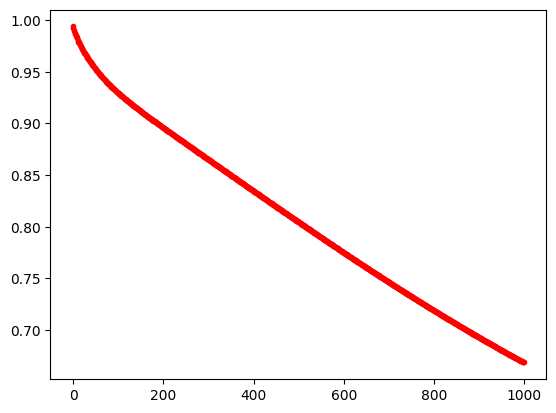

In [179]:
pyplot.plot(epoc,lossarray,'.-',color='red')
pyplot.show()

In [180]:
print(weight_matrix)

[array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975, -0.56228753, -1.01283112,  0.31424733,
       -0.90802408, -1.4123037 ,  1.46564877, -0.2257763 ,  0.0675282 ,
       -1.42474819]), array([ 0.4967141 , -0.13979484,  0.64983052,  1.52302982, -0.23507215,
       -0.23292634,  1.57921279,  0.76723617, -0.46848931,  0.54256004,
       -0.46319045, -0.46552857, -0.5614658 , -1.01247154,  0.31306602,
       -0.90838054, -1.41193584,  1.46563738, -0.224998  ,  0.06735951,
       -1.42535779]), array([ 0.49671404, -0.14118747,  0.6519305 ,  1.52302979, -0.23592465,
       -0.23173648,  1.57921277,  0.76713782, -0.46753536,  0.54256003,
       -0.46293079, -0.46533843, -0.56065887, -1.0121317 ,  0.31191925,
       -0.9087395 , -1.41157734,  1.46563784, -0.22421923,  0.0671869 ,
       -1.42596395]), array([ 0.49671399, -0.14245332,  0.65399003,  1.52302976, -0.2367162

In [181]:
print(np.shape(weight_matrix))

(1001, 21)


In [182]:
# df = pd.DataFrame(weight_matrix)
transposed_matrix = np.transpose(weight_matrix)

# Convert transposed matrix to dataframe
df = pd.DataFrame(weight_matrix)

# Display the dataframe
df







,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.496714,-0.138264,0.647689,1.52303,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,-0.465730,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748
1,0.496714,-0.139795,0.649831,1.52303,-0.235072,-0.232926,1.579213,0.767236,-0.468489,0.542560,...,-0.465529,-0.561466,-1.012472,0.313066,-0.908381,-1.411936,1.465637,-0.224998,0.067360,-1.425358
2,0.496714,-0.141187,0.651931,1.52303,-0.235925,-0.231736,1.579213,0.767138,-0.467535,0.542560,...,-0.465338,-0.560659,-1.012132,0.311919,-0.908740,-1.411577,1.465638,-0.224219,0.067187,-1.425964
3,0.496714,-0.142453,0.653990,1.52303,-0.236716,-0.230567,1.579213,0.767132,-0.466611,0.542560,...,-0.465159,-0.559866,-1.011810,0.310805,-0.909101,-1.411227,1.465649,-0.223440,0.067011,-1.426567
4,0.496714,-0.143603,0.656011,1.52303,-0.237452,-0.229416,1.579213,0.767210,-0.465717,0.542560,...,-0.464990,-0.559086,-1.011506,0.309721,-0.909465,-1.410885,1.465671,-0.222660,0.066831,-1.427167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.496803,-0.344879,0.930819,1.52309,-0.459729,0.092280,1.579235,1.291213,-0.860216,0.542563,...,-0.736528,-0.410676,-0.887876,0.037682,-1.667726,-0.936747,1.749794,0.489405,-0.236783,-1.835619
997,0.496803,-0.345051,0.930952,1.52309,-0.459910,0.092540,1.579235,1.291560,-0.860646,0.542563,...,-0.736780,-0.410648,-0.887732,0.037509,-1.668470,-0.936280,1.750071,0.490134,-0.237161,-1.835969
998,0.496803,-0.345222,0.931086,1.52309,-0.460091,0.092801,1.579235,1.291906,-0.861076,0.542563,...,-0.737033,-0.410621,-0.887587,0.037336,-1.669215,-0.935813,1.750349,0.490863,-0.237540,-1.836320
999,0.496803,-0.345394,0.931219,1.52309,-0.460271,0.093062,1.579235,1.292253,-0.861505,0.542563,...,-0.737285,-0.410593,-0.887442,0.037163,-1.669959,-0.935346,1.750626,0.491592,-0.237918,-1.836670


In [192]:
print(final_output)

[array([1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       0, 2, 2], dtype=int64), array([1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       0, 2, 2], dtype=int64), array([1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21060\1590742126.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


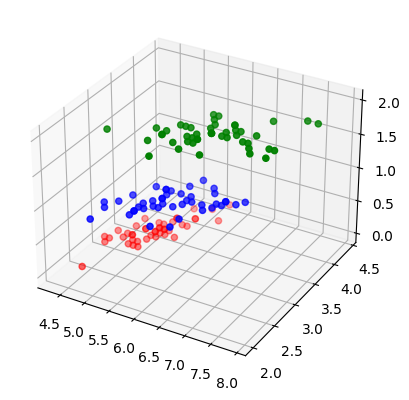

In [200]:
temp = np.array(Y_train).flatten()
cmap = plt.cm.get_cmap('jet')
colors = np.where(temp == 0, 'red', np.where(temp == 1, 'blue', 'green'))

Y_train = np.reshape(Y_train, (len(Y_train), 1))
figure = plt.figure()
axis = figure.add_subplot(projection='3d')
axis.scatter(X_train[:,0], X_train[:,1],Y_train,  c=colors)
# show the plot
pyplot.show()
# print(X_train[:,0])

# print(Y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21060\2738482394.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


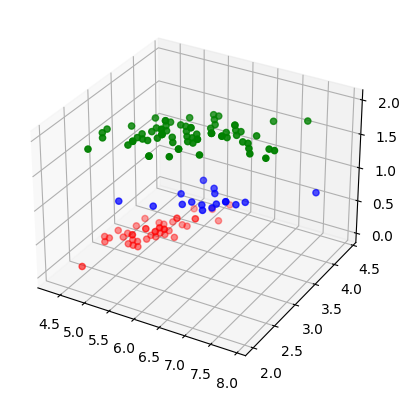

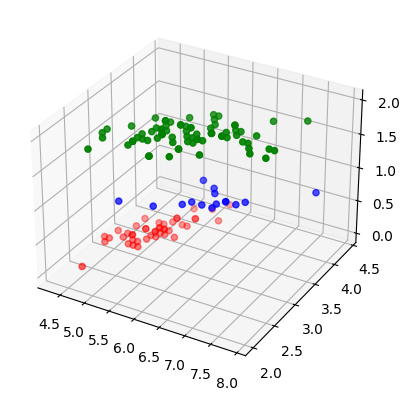

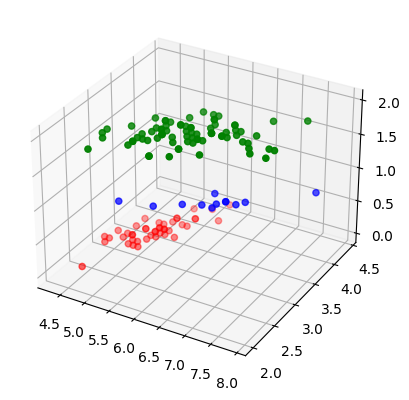

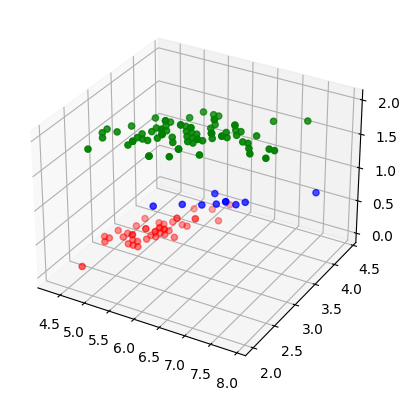

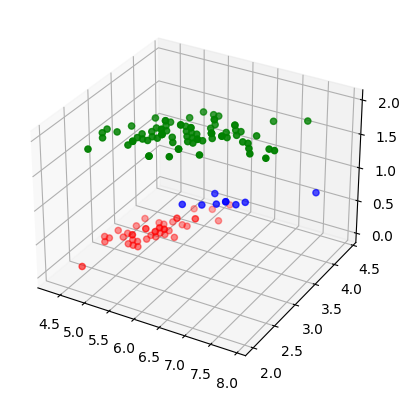

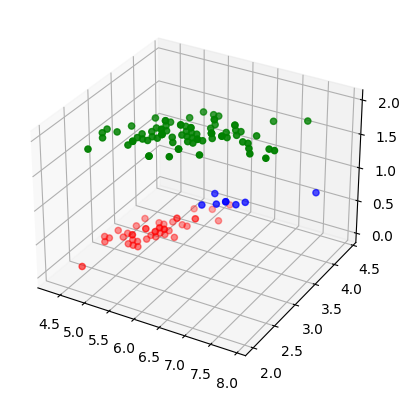

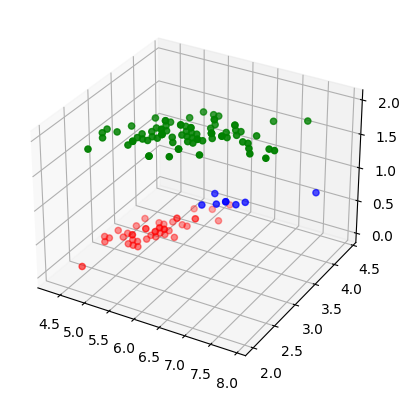

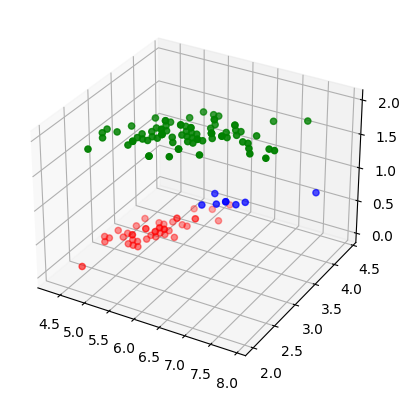

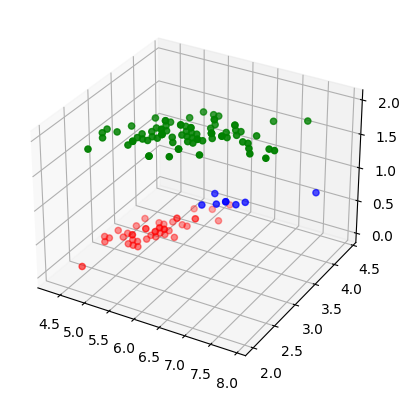

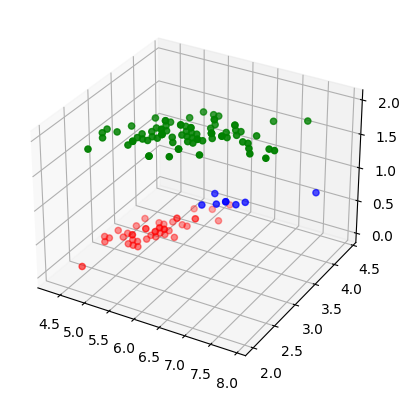

In [201]:
# print(final_output[0])
# print(Y_train)
for i in range(0,num_epochs,100):
    cmap = plt.cm.get_cmap('jet')
    colors = np.where(final_output[i] == 0, 'red', np.where(final_output[i] == 1, 'blue', 'green'))

    Y_train = np.reshape(Y_train, (len(Y_train), 1))
    figure = plt.figure()
    axis = figure.add_subplot(projection='3d')
    axis.scatter(X_train[:,0], X_train[:,1],final_output[i],  c=colors)
    pyplot.show()